In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from numpy import hstack
from keras.utils import np_utils
from numpy import array

In [3]:
# 신경망의 빠른학습을 위한 정규화
def MinMaxScalar(data):
    mise1 = data - np.min(data, 0)
    mise2 = np.max(data, 0) - np.min(data, 0)
    return mise1 / mise2

In [4]:
feature = 1 # 다음날 미세먼지를 예측하기
steps = 1# 지난날 데이터를 기반으로 하여 

In [5]:
# 데이터 전처리 
from numpy import array # name 'array' is not defined 오류가 출력됨

def split(mise_data, steps):
    X, y = list(), list()
    
    for i in range(len(mise_data)):
        end = i + steps
        
        if end > len(mise_data)-1:
            break
            
        spl_x, spl_y = mise_data[i:end], mise_data[end]
        X.append(spl_x)
        y.append(spl_y)
        
    return array(X), array(y)
   #  return X, y

In [9]:
# 강남구데이터(2010.01.01~2018.12.31)를 Train_set으로 지정하여 데이터 전처리하기 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 저장된 csv 파일을 읽어오기 위해 경로지정
os.chdir("D:/AiProject")

# csv 파일 읽어오기
df = pd.read_csv('Mapo-training.csv', encoding = "CP949" ) #utf-8오류떠서 인코딩방식지정함
df['PM10'] = df['PM10'].fillna(df['PM10'].mean()).astype(float) # PM10 부분에 공백이 있어서 공백 데이터를 해당 열의 평균으로 대체
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean()).astype(float) # PM 2.5 부분에 공백이 있어서 공백 데이터를 해당 열의 평균으로 대체 


In [13]:
from numpy import array

# PM 10 열만을 출력하여 배열로 생성 
pm10_data = array(df["PM10"])
# PM 2.5 열만을 출력하여 배열로 생성
pm25_data = array(df["PM2.5"])

x_pm10, y_pm10 = split(pm10_data, steps)
x_pm25, y_pm25 = split(pm25_data, steps)

print(x_pm10.shape)
print(y_pm10.shape)

# 정규화함수를 호출하여 각각의 배열 요소들을 정규화 
a = MinMaxScalar(x_pm10)
b = MinMaxScalar(y_pm10)
c = MinMaxScalar(x_pm25)
d = MinMaxScalar(y_pm25)
# print(a)

(3269, 1)
(3269,)


In [15]:
X_pm10 = a.reshape((x_pm10.shape[0], x_pm10.shape[1], 1))
X_pm25 = a.reshape((x_pm25.shape[0], x_pm25.shape[1], 1))

X_pm10.shape
# RNN에 입력할 훈련셋 생성완료

(3269, 1, 1)

In [16]:
# 심층 RNN 구현 LSTM 알고리즘 사용
model = Sequential()
model.add(LSTM(32, activation = 'relu', input_shape = (steps,feature) )) 

# model.add(LSTM(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

hist1 = model.fit(X_pm10, b, epochs = 50, batch_size = 10 , verbose = 1)

model.summary


Epoch 1/50
327/327 [==============================] - 0s 811us/step - loss: 0.0026 - accuracy: 6.1181e-04
Epoch 2/50
327/327 [==============================] - 0s 799us/step - loss: 0.0020 - accuracy: 6.1181e-04
Epoch 3/50
327/327 [==============================] - 0s 817us/step - loss: 0.0018 - accuracy: 6.1181e-04
Epoch 4/50
327/327 [==============================] - 0s 769us/step - loss: 0.0017 - accuracy: 6.1181e-04
Epoch 5/50
327/327 [==============================] - 0s 775us/step - loss: 0.0016 - accuracy: 6.1181e-04
Epoch 6/50
327/327 [==============================] - 0s 787us/step - loss: 0.0016 - accuracy: 6.1181e-04
Epoch 7/50
327/327 [==============================] - 0s 805us/step - loss: 0.0016 - accuracy: 6.1181e-04
Epoch 8/50
327/327 [==============================] - 0s 799us/step - loss: 0.0016 - accuracy: 6.1181e-04
Epoch 9/50
327/327 [==============================] - 0s 802us/step - loss: 0.0016 - accuracy: 6.1181e-04
Epoch 10/50
327/327 [=========================

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000016DB8D9E448>>

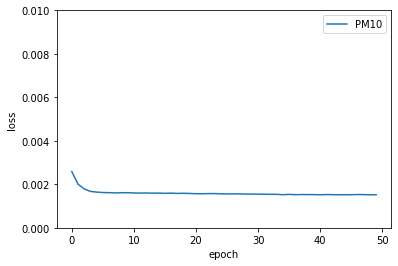

In [17]:
plt.plot(hist1.history['loss'])
plt.ylim(0.0, 0.01)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['PM10'], loc = 'upper right')
plt.show()

In [21]:
TEST1 = pd.read_csv('Mapo-test01.csv', encoding = 'CP949') # 테스트셋
TEST1['PM10'] = TEST1['PM10'].fillna(TEST1['PM10'].mean()).astype(float) 

TEST2 = pd.read_csv('Mapo-tests.csv', encoding = 'CP949') # 테스트셋
TEST2['PM10'] = TEST2['PM10'].fillna(TEST2['PM10'].mean()).astype(float) 

test_pm10_1 = array(TEST1['PM10'])
x_testpm10_1, y_testpm10_1 = split(test_pm10_1, steps)
test_a1 = MinMaxScalar(x_testpm10_1)
test_b1 = MinMaxScalar(y_testpm10_1)
Test_PM10_1 = MinMaxScalar(test_a1)
x_testpm10_1= test_a1.reshape((x_testpm10_1.shape[0], x_testpm10_1.shape[1], 1))

# 테스트 모델을 가지고 예측해보기
y_pred1 = model.predict(x_testpm10_1)

test_pm10_2 = array(TEST2['PM10'])
x_testpm10_2, y_testpm10_2 = split(test_pm10_2, steps)
test_a2 = MinMaxScalar(x_testpm10_2)
test_b2 = MinMaxScalar(y_testpm10_2)
Test_PM10_2 = MinMaxScalar(test_a2)
x_testpm10_2 = test_a2.reshape((x_testpm10_2.shape[0], x_testpm10_2.shape[1], 1))

# 테스트 모델을 가지고 예측해보기
y_pred2 = model.predict(x_testpm10_2)

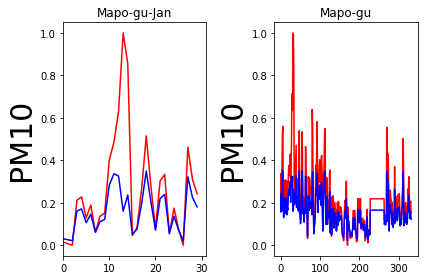

In [24]:
# 2019.01월 자료를 test set으로 생성하여 예측값과 실제값 비교
# 2019.02.01~ 2019.12.31 자료를 test set으로 만들어 예측값과 실제값 비교 
# 수집한 자료를 보면 가끔씩 비정상적으로 미세먼지가 많이 측정된 날이 보임 평균보다 많은 미세먼지 검출된 날임

plt.subplot(1,2,1)
plt.plot(Test_PM10_1, 'r')
plt.plot(y_pred1, 'b')
plt.title("Mapo-gu-Jan")
plt.xlim(0,31)
plt.ylabel('PM10', fontsize = 30)


plt.subplot(1,2,2)
plt.plot(Test_PM10_2, 'r')
plt.plot(y_pred2, 'b')
plt.title("Mapo-gu")
plt.ylabel('PM10', fontsize = 30)


plt.tight_layout()
plt.show()

In [26]:
# 예측값과 실제값 오류를 알아보기
from sklearn.metrics import mean_squared_error
from math import sqrt

error1 = sqrt(mean_squared_error(Test_PM10_1, y_pred1))
error2 = sqrt(mean_squared_error(Test_PM10_2, y_pred2))

print("2019년 마포구 1월 미세먼지예측값 오차율 = ", error1)
print("2019년 마포구 2월~12월 미세먼지예측값 오차율 = ", error2)

2019년 마포구 1월 미세먼지예측값 오차율 =  0.20925387589617733
2019년 마포구 2월~12월 미세먼지예측값 오차율 =  0.10431784219544704


In [27]:
# 초미세먼지 학습시켜 예측해보기 
model2 = Sequential()
model2.add(LSTM(32, activation = 'relu', input_shape = (steps,feature) )) 
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss='mse')

hist2 = model2.fit(X_pm25, c, epochs = 50, batch_size = 10, verbose = 1)
model.summary

Epoch 1/50
327/327 [==============================] - 0s 772us/step - loss: 0.0097
Epoch 2/50
327/327 [==============================] - 0s 778us/step - loss: 0.0062
Epoch 3/50
327/327 [==============================] - 0s 759us/step - loss: 0.0059
Epoch 4/50
327/327 [==============================] - 0s 762us/step - loss: 0.0057
Epoch 5/50
327/327 [==============================] - 0s 769us/step - loss: 0.0057
Epoch 6/50
327/327 [==============================] - 0s 766us/step - loss: 0.0056
Epoch 7/50
327/327 [==============================] - 0s 766us/step - loss: 0.0055
Epoch 8/50
327/327 [==============================] - 0s 756us/step - loss: 0.0055
Epoch 9/50
327/327 [==============================] - 0s 772us/step - loss: 0.0054
Epoch 10/50
327/327 [==============================] - 0s 772us/step - loss: 0.0053
Epoch 11/50
327/327 [==============================] - 0s 759us/step - loss: 0.0053
Epoch 12/50
327/327 [==============================] - 0s 753us/step - loss: 0.0052
E

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000016DB8D9E448>>

In [32]:
TEST1 = pd.read_csv('Mapo-tests.csv', encoding = 'CP949') # 테스트셋
TEST1['PM2.5'] = TEST1['PM2.5'].fillna(df['PM2.5'].mean()).astype(float)


test_pm25_1 = array(TEST1['PM2.5'])
x_testpm25_1, y_testpm25_1 = split(test_pm25_1, steps)
test_a1 = MinMaxScalar(x_testpm25_1)
test_b1 = MinMaxScalar(y_testpm25_1)
Test_PM25_1 = MinMaxScalar(test_a1)
x_testpm25_1= test_a1.reshape((x_testpm25_1.shape[0], x_testpm25_1.shape[1], 1))

# 테스트 모델을 가지고 예측해보기
y_pred1 = model.predict(x_testpm25_1)


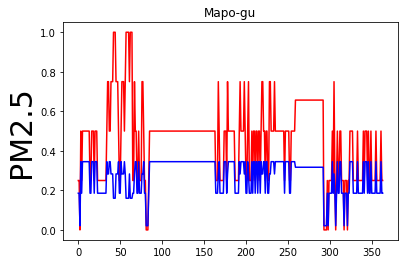

In [33]:
plt.plot(Test_PM25_1, 'r')
plt.plot(y_pred1, 'b')
plt.title("Mapo-gu")
plt.ylabel('PM2.5', fontsize = 30)
plt.show()


In [34]:
# 예측값과 실제 값 오류를 알아보기
from sklearn.metrics import mean_squared_error
from math import sqrt

error1 = sqrt(mean_squared_error(Test_PM25_1, y_pred1))


print("2019년 마포구 초미세먼지예측값 오차율 = ", error1)


2019년 마포구 초미세먼지예측값 오차율 =  0.24334920718279668
